In [501]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [502]:
import os
import matplotlib.pylab as plt

In [503]:
header_names = ["timestamp","price","size","bid","ask","volume",
                "total_buy", "total_sell_volume", "max_up_slippage", "max_down_slippage",
                "m1_buy","m5_buy","m10_buy","m20_buy","m50_buy",
                "m1_sell","m5_sell","m10_sell","m20_sell","m50_sell"]

In [504]:
# first, combine dates into single files
files = os.listdir('../data')
tsv_files = [f for f in files if ".log" in f]
tsv_files.sort()
tsv_files

['book.2019-05-27-103826.0.log',
 'book.2019-05-30-080440.0.log',
 'book.2019-05-30-144435.0.log',
 'book.2019-05-30-160512.0.log',
 'book.2019-05-30-171403.0.log',
 'book.2019-05-30-215304.0.log',
 'book.2019-05-31-075424.0.log',
 'book.2019-05-31-081655.0.log',
 'book.2019-05-31-083056.0.log',
 'book.2019-05-31-083115.0.log',
 'book.2019-05-31-084413.0.log',
 'book.2019-05-31-084635.0.log',
 'book.2019-05-31-170504.0.log',
 'book.2019-06-01-000549.0.log']

In [505]:
li = []

for filename in tsv_files:
    df = pd.read_csv('../data/'+filename, sep='\t', index_col=None, header=0)
    df.columns = header_names
    li.append(df)

frame = pd.concat(li, axis=0, sort=False, ignore_index=True)
frame.head(10)

,timestamp,price,size,bid,ask,volume,total_buy,total_sell_volume,max_up_slippage,max_down_slippage,m1_buy,m5_buy,m10_buy,m20_buy,m50_buy,m1_sell,m5_sell,m10_sell,m20_sell,m50_sell
0,2019-05-27T17:38:33.430Z,8725.11,0.011863,8725.10,8725.16,31391.224792,54635567.0,184140.0,250000.0,0.01,8670.00,8480.6,8220.00,7500.0,4487.0,8768.81,9000.0,9234.99,10040.79,250000.0
1,2019-05-27T17:38:42.114Z,8720.08,0.079481,8719.36,8722.97,31391.224792,54635567.0,184140.0,250000.0,0.01,8668.00,8480.6,8210.00,7493.0,4469.2,8768.16,9000.0,9233.04,10040.79,250000.0
2,2019-05-27T17:38:53.868Z,8709.29,0.018221,8706.20,8714.08,31397.255512,54635567.0,184140.0,250000.0,0.01,8668.00,8480.6,8210.00,7500.0,4487.0,8768.16,9000.0,9234.99,10040.79,250000.0
3,2019-05-27T17:39:01.808Z,8709.31,0.058725,8708.03,8709.31,31397.255512,54635567.0,184140.0,250000.0,0.01,8668.00,8480.6,8210.00,7500.0,4487.0,8764.98,9000.0,9233.04,10040.79,250000.0
4,2019-05-27T17:39:12.643Z,8704.11,0.020628,8701.42,8706.13,31397.255512,54635567.0,184140.0,250000.0,0.01,8668.00,8480.6,8210.00,7500.0,4487.0,8765.99,9000.0,9220.00,10040.79,250000.0
5,2019-05-27T17:39:21.475Z,8700.11,0.100000,8700.10,8700.11,31397.255512,54635567.0,184140.0,250000.0,0.01,8663.20,8480.6,8230.00,7500.0,4487.0,8761.77,9000.0,9200.00,10015.02,250000.0
6,2019-05-27T17:39:33.820Z,8708.60,0.050000,8703.13,8710.80,31397.255512,54635567.0,184140.0,250000.0,0.01,8675.39,8480.6,8250.00,7500.0,4487.0,8765.99,9000.0,9250.00,10040.79,250000.0
7,2019-05-27T17:39:42.500Z,8712.93,0.060165,8714.36,8717.90,31424.562591,54635567.0,184140.0,250000.0,0.01,8682.71,8480.6,8236.79,7500.0,4487.0,8777.75,9000.0,9240.00,10040.79,250000.0
8,2019-05-27T17:39:49.223Z,8717.54,0.062612,8712.94,8717.20,31424.562591,54635567.0,184140.0,250000.0,0.01,8680.00,8480.6,8233.71,7500.0,4487.0,8765.99,9000.0,9200.40,10025.00,250000.0
9,2019-05-27T17:40:03.276Z,8708.30,0.112463,8705.00,8708.24,31424.562591,54635567.0,184140.0,250000.0,0.01,8662.03,8480.6,8202.00,7490.0,4469.2,8760.00,9000.0,9200.00,10015.02,250000.0


In [506]:
dates = pd.to_datetime(frame.timestamp)
frame['date'] = dates.dt.date
frame['time'] = dates.dt.time
frame['hour'] = dates.dt.hour
frame['minute'] = dates.dt.minute

frame.head()

,timestamp,price,size,bid,ask,volume,total_buy,total_sell_volume,max_up_slippage,max_down_slippage,...,m50_buy,m1_sell,m5_sell,m10_sell,m20_sell,m50_sell,date,time,hour,minute
0,2019-05-27T17:38:33.430Z,8725.11,0.011863,8725.10,8725.16,31391.224792,54635567.0,184140.0,250000.0,0.01,...,4487.0,8768.81,9000.0,9234.99,10040.79,250000.0,2019-05-27,17:38:33.430000,17,38
1,2019-05-27T17:38:42.114Z,8720.08,0.079481,8719.36,8722.97,31391.224792,54635567.0,184140.0,250000.0,0.01,...,4469.2,8768.16,9000.0,9233.04,10040.79,250000.0,2019-05-27,17:38:42.114000,17,38
2,2019-05-27T17:38:53.868Z,8709.29,0.018221,8706.20,8714.08,31397.255512,54635567.0,184140.0,250000.0,0.01,...,4487.0,8768.16,9000.0,9234.99,10040.79,250000.0,2019-05-27,17:38:53.868000,17,38
3,2019-05-27T17:39:01.808Z,8709.31,0.058725,8708.03,8709.31,31397.255512,54635567.0,184140.0,250000.0,0.01,...,4487.0,8764.98,9000.0,9233.04,10040.79,250000.0,2019-05-27,17:39:01.808000,17,39
4,2019-05-27T17:39:12.643Z,8704.11,0.020628,8701.42,8706.13,31397.255512,54635567.0,184140.0,250000.0,0.01,...,4487.0,8765.99,9000.0,9220.00,10040.79,250000.0,2019-05-27,17:39:12.643000,17,39


In [507]:
limits = ['m1','m5','m10','m20']

for limit in limits:
    frame[limit+'_buy_diff'] = frame.price - frame[limit+'_buy']
    frame[limit+'_sell_diff'] = frame[limit+'_sell'] - frame.price
    frame[limit+'_range'] = frame[limit+'_sell'] - frame[limit+'_buy']
#     frame[limit+'_percentage'] = frame[limit+'_buy_diff'] / frame[limit+'_range']
#     frame[limit+'_support'] = frame.price * (1-frame[limit+'_percentage'])
    frame[limit+'_mid'] = (frame[limit+'_buy'] + frame[limit+'_sell']) / 2
    frame[limit+'_pull'] = frame.price + frame[limit+'_sell_diff'] - frame[limit+'_buy_diff']

In [508]:
frame.filter(items=['m1_range','m1_buy','m1_buy_diff', 'price','m1_sell_diff', 'm1_sell', 'm1_mid', 'm1_pull']).head(5)

,m1_range,m1_buy,m1_buy_diff,price,m1_sell_diff,m1_sell,m1_mid,m1_pull
0,98.81,8670.0,55.11,8725.11,43.70,8768.81,8719.405,8713.70
1,100.16,8668.0,52.08,8720.08,48.08,8768.16,8718.080,8716.08
2,100.16,8668.0,41.29,8709.29,58.87,8768.16,8718.080,8726.87
3,96.98,8668.0,41.31,8709.31,55.67,8764.98,8716.490,8723.67
4,97.99,8668.0,36.11,8704.11,61.88,8765.99,8716.995,8729.88


In [509]:
frame.filter(items=['m1_pull','m5_pull','m10_pull','m20_pull']).head(5)

,m1_pull,m5_pull,m10_pull,m20_pull
0,8713.70,8755.49,8729.88,8815.68
1,8716.08,8760.52,8722.96,8813.71
2,8726.87,8771.31,8735.70,8831.50
3,8723.67,8771.29,8733.73,8831.48
4,8729.88,8776.49,8725.89,8836.68


In [510]:
charts = {
    "minute": frame.groupby(['date', 'hour', 'minute']).mean().reset_index(),
    "hourly": frame.groupby(['date', 'hour']).mean().reset_index(),
    "daily": frame.groupby(['date']).mean().reset_index()
}

In [511]:
charts['daily'].head(5)

,date,price,size,bid,ask,volume,total_buy,total_sell_volume,max_up_slippage,max_down_slippage,...,m10_buy_diff,m10_sell_diff,m10_range,m10_mid,m10_pull,m20_buy_diff,m20_sell_diff,m20_range,m20_mid,m20_pull
0,2019-05-27,8776.970212,0.070193,8776.126143,8777.523164,25408.987130,5.463557e+07,184140.000000,250000.000000,0.01,...,517.414300,384.544361,901.958661,8710.535242,8644.100273,1258.809219,1222.185215,2480.994434,8758.658210,8740.346208
1,2019-05-28,8727.086002,0.114079,8726.573938,8727.337590,13557.685665,5.463557e+07,184140.000000,250000.000000,0.01,...,510.430939,353.000068,863.431007,8648.370566,8569.655130,1171.029655,1075.446331,2246.475986,8679.294340,8631.502679
2,2019-05-29,8676.548511,0.099133,8676.207768,8676.761569,12328.019728,5.463557e+07,184140.000000,250000.000000,0.01,...,462.965395,331.105367,794.070762,8610.618497,8544.688483,1119.788047,871.072152,1990.860199,8552.190564,8427.832616
3,2019-05-30,8593.758476,0.139552,8592.862508,8594.149653,18622.579581,5.463557e+07,184140.000000,250000.000000,0.01,...,497.723235,565.916750,1063.639985,8627.855234,8661.951992,1264.006724,1213.213835,2477.220559,8568.362032,8542.965587
4,2019-05-31,8352.855612,0.142225,8352.131355,8353.117317,29061.745382,5.497321e+07,184234.786452,224998.929817,0.01,...,727.846799,705.664662,1433.511461,8341.764544,8330.673475,1472.445282,1351.026403,2823.471685,8292.146173,8231.436733


<IPython.core.display.Javascript object>


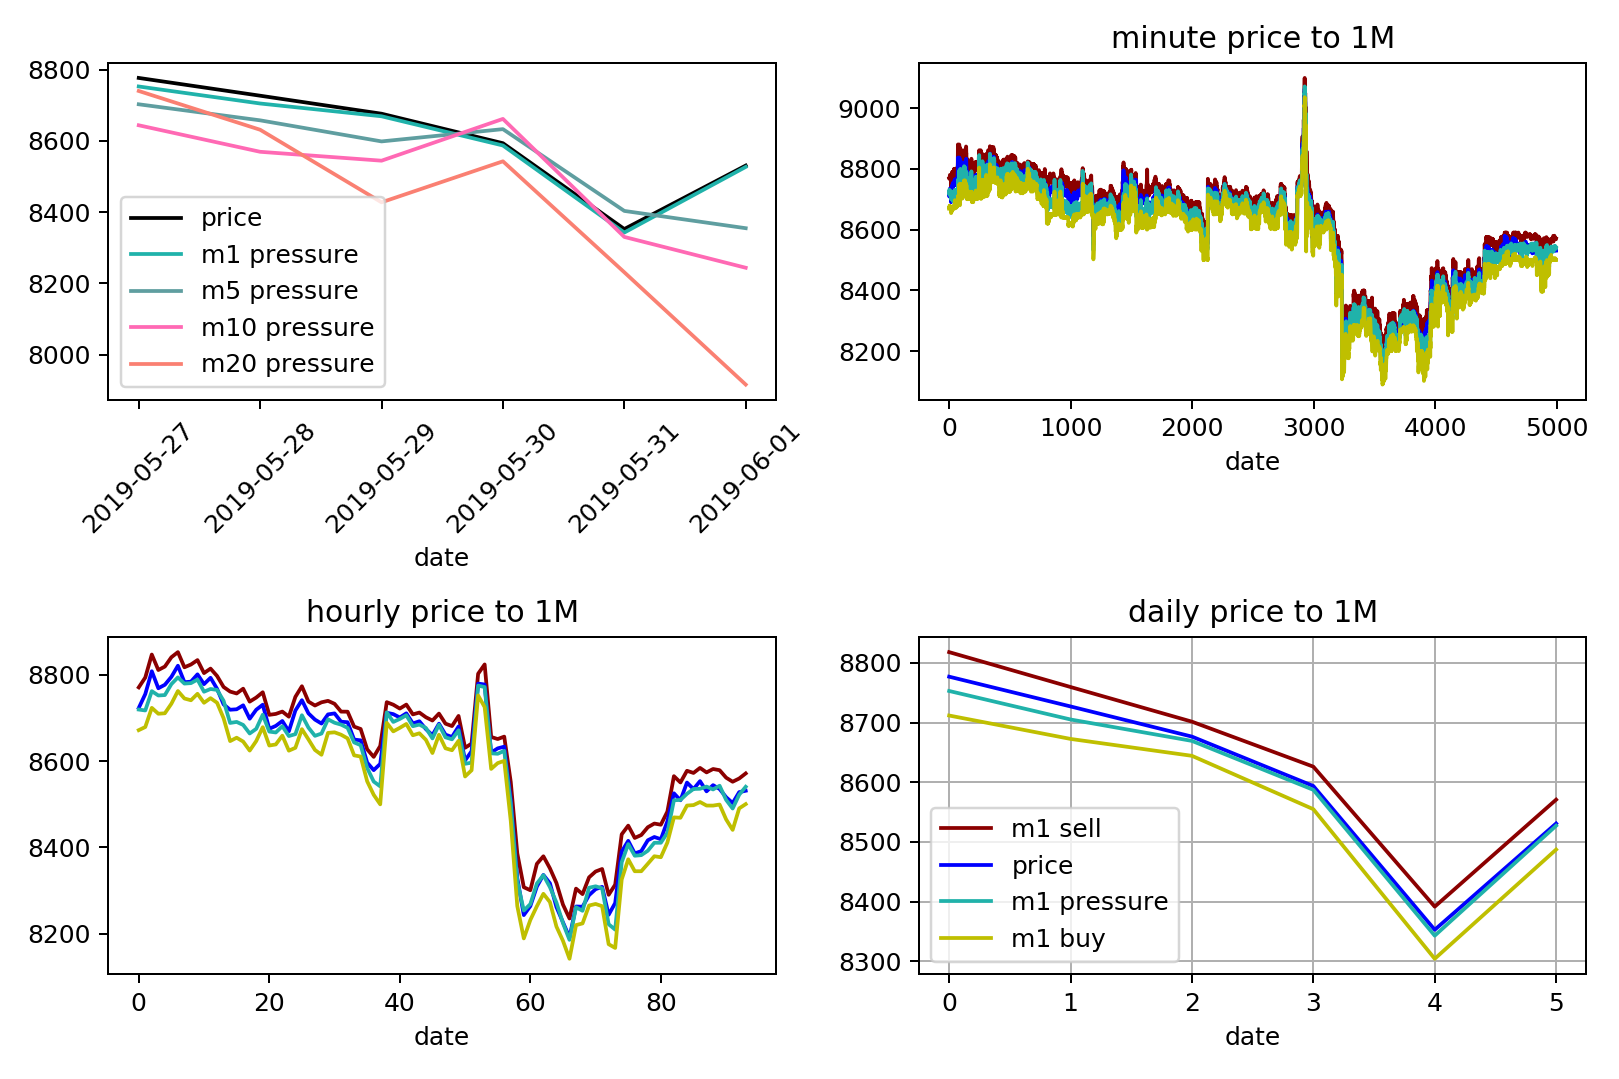

In [513]:
%matplotlib notebook
import matplotlib.dates as mdates

plt.figure(1, figsize=(9,6))
plt.ylabel('Price')

num=221
ax = plt.subplot(num)
plt.xlabel('date')
dateLabels = charts['daily'].date
plt.plot(dateLabels, charts['daily'].price, 'k', label='price')
plt.plot(dateLabels, charts['daily'].m1_pull, 'lightseagreen', label='m1 pull')
plt.plot(dateLabels, charts['daily'].m5_pull, 'cadetblue', label='m5 pull')
plt.plot(dateLabels, charts['daily'].m10_pull, 'hotpink', label='m10 pull')
plt.plot(dateLabels, charts['daily'].m20_pull, 'salmon', label='m20 pull')
plt.legend()
plt.xticks(dateLabels, dateLabels, rotation=45)
plt.axis('tight')

for period in charts:
    num += 1
    plt.subplot(num)
    plt.title(period+' price to 1M')
    plt.xlabel('date')
    plt.plot(charts[period].m1_sell, 'darkred', label='m1 sell')
    plt.plot(charts[period].price, 'b', label='price')
    plt.plot(charts[period].m1_pull, 'lightseagreen', label='m1 pull')
    plt.plot(charts[period].m1_buy, 'y', label='m1 buy')

plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


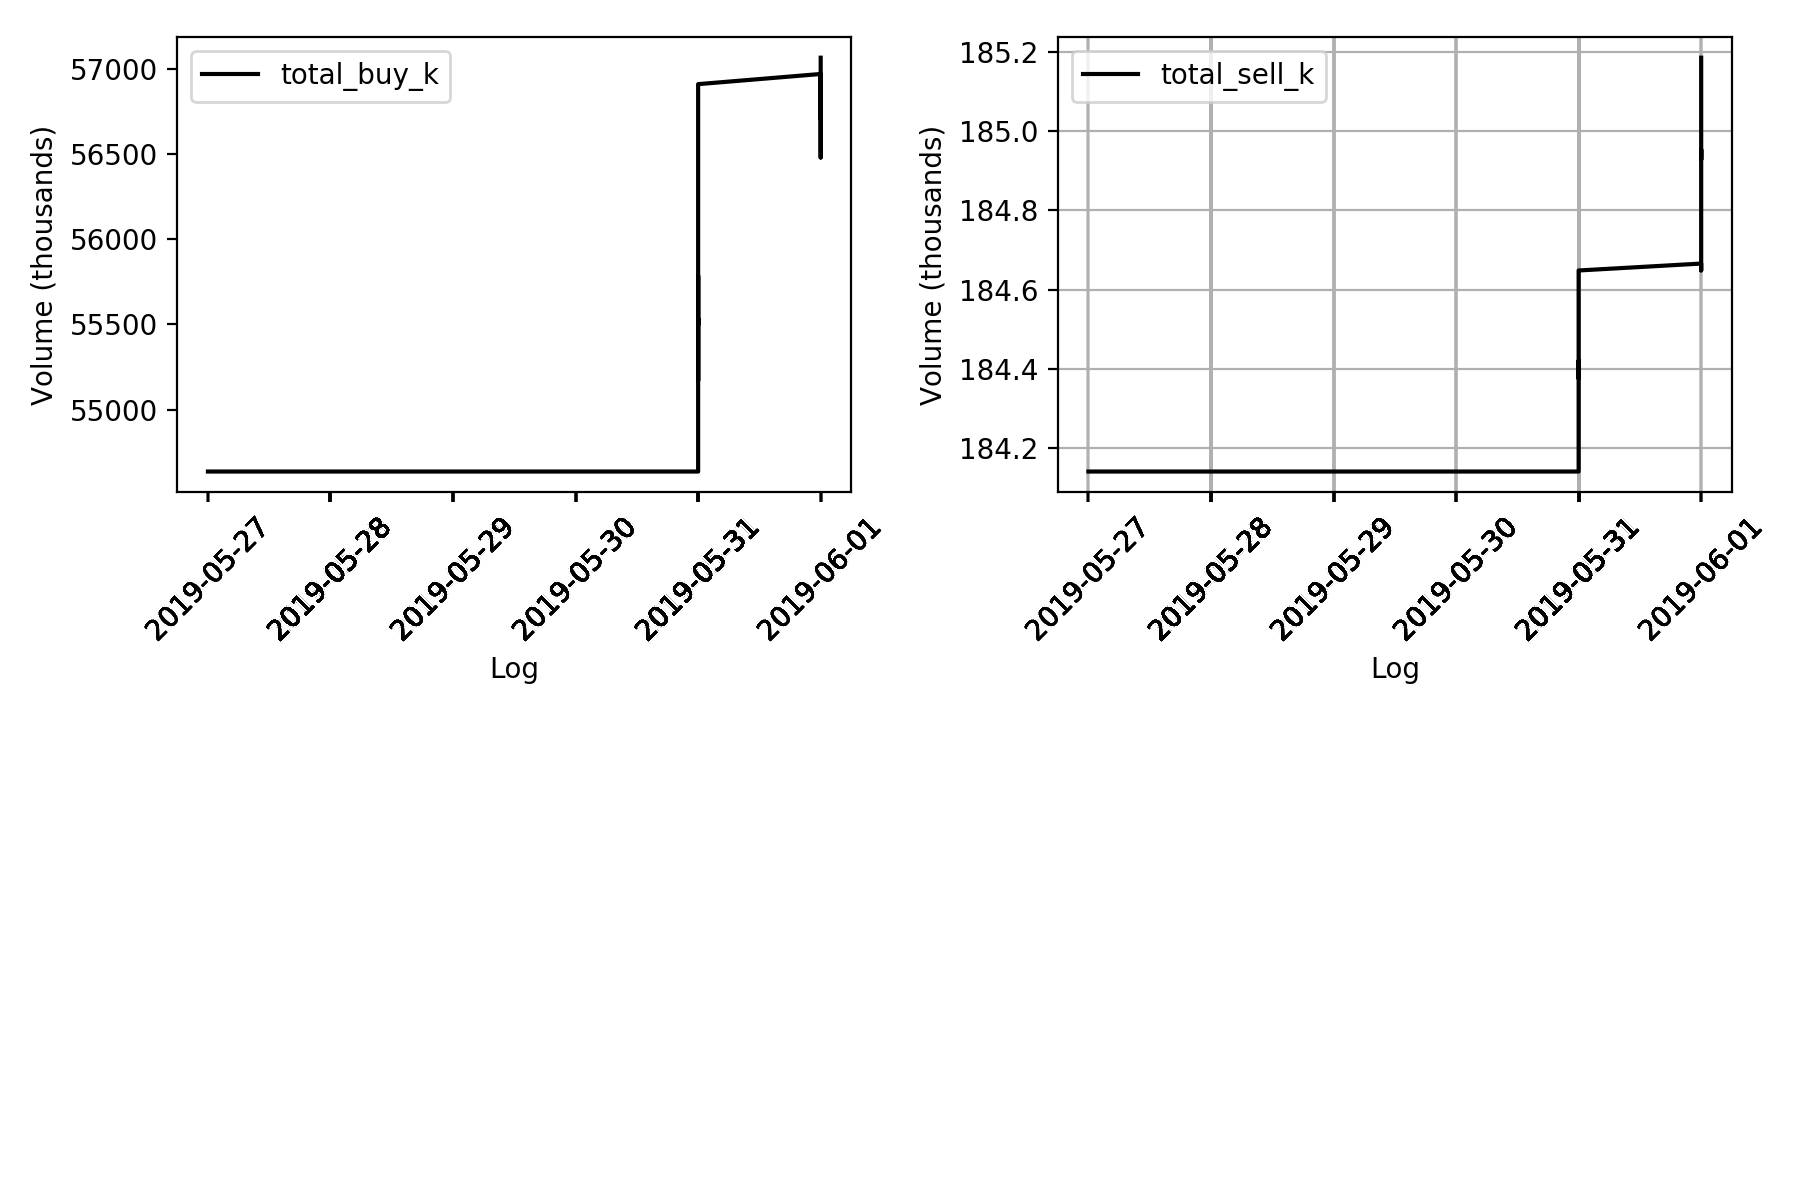

In [500]:
%matplotlib notebook

plt.figure(2, figsize=(9,6))

plot_fields = ['total_buy_k', 'total_sell_k']

chart = charts['hourly']

chart['total_buy_k'] = chart['total_buy'] / 1000
chart['total_sell_k'] = chart['total_sell_volume'] / 1000

dateLabels = chart.date

num=220

for field in plot_fields:
    num += 1
    plt.subplot(num)
    plt.ylabel('Volume (thousands)')
    plt.xlabel('Log')
    plt.plot(dateLabels, chart[field], 'k', label=field)
    plt.xticks(dateLabels, dateLabels, rotation=45)
    plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()